# Projet S2-B

In [2]:
import pandas as pd 
#import des dataset 
superficie = pd.read_csv("../../../data/houseMarket/superficie.csv", header=None)
nombre_de_sdb = pd.read_csv("../../../data/houseMarket/nombre_de_sdb.csv", header=None)
nombre_de_chambres = pd.read_csv("../../../data/houseMarket/nombre_de_chambres.csv",header=None)
print('*** dataset loaded ***')

*** dataset loaded ***


In [9]:
print("\n ************ Visualisation des datasets : ************  \n\n\nSuperficie data : \n {} \n\nSalle de bain data : \n {} \n\nChambre data : \n\n {}".format(superficie.head(), nombre_de_sdb.head(), nombre_de_chambres.head()))


 ************ Visualisation des datasets : ************  


Superficie data : 
    0      1
0  0  28844
1  1  27667
2  2  14742
3  3  28089
4  4  11713 

Salle de bain data : 
    0  1
0  0  2
1  1  1
2  2  1
3  3  3
4  4  1 

Chambre data : 

    0  1
0  0  1
1  1  4
2  2  1
3  3  4
4  4  2


In [13]:
#réindexation 
superficie = superficie.rename(columns={0:"id",1:"supercificie"})
nombre_de_sdb = nombre_de_sdb.rename(columns={0:"id", 1:"nombre_de_sdb"})
nombre_de_chambres = nombre_de_chambres.rename(columns={0:"id", 1:"nombre_de_chambres"})

In [15]:
print("\n ************ Visualisation des datasets après nouvelle indexation ************  \n\n\nSuperficie data : \n {} \n\nSalle de bain data : \n {} \n\nChambre data : \n\n {}".format(superficie.head(), nombre_de_sdb.head(), nombre_de_chambres.head()))


 ************ Visualisation des datasets après nouvelle indexation : ************  


Superficie data : 
    id  supercificie
0   0         28844
1   1         27667
2   2         14742
3   3         28089
4   4         11713 

Salle de bain data : 
    id  nombre_de_sdb
0   0              2
1   1              1
2   2              1
3   3              3
4   4              1 

Chambre data : 

    id  nombre_de_chambres
0   0                   1
1   1                   4
2   2                   1
3   3                   4
4   4                   2


In [16]:
#concatenation
dataset = pd.concat([nombre_de_sdb, nombre_de_chambres, superficie], axis=1)

In [36]:
#problème on a trop de colonne ID 
dataset.head()

,id,nombre_de_sdb,id,nombre_de_chambres,id,supercificie
0,0,2,0,1,0,28844
1,1,1,1,4,1,27667
2,2,1,2,1,2,14742
3,3,3,3,4,3,28089
4,4,1,4,2,4,11713


In [29]:
#première fusion
datasetBis = nombre_de_chambres.join(nombre_de_sdb.set_index('id'), on='id')
datasetBis.head()

,id,nombre_de_chambres,nombre_de_sdb
0,0,1,2
1,1,4,1
2,2,1,1
3,3,4,3
4,4,2,1


In [32]:
#fusion de la colonne suivante 
datasetBisBis = datasetBis.join(superficie.set_index('id'), on='id')
datasetBisBis.head()

,id,nombre_de_chambres,nombre_de_sdb,supercificie
0,0,1,2,28844
1,1,4,1,27667
2,2,1,1,14742
3,3,4,3,28089
4,4,2,1,11713


In [33]:
#statistique descriptive 
datasetBisBis.supercificie.mean()

20439.77

In [34]:
#statistique bis 
datasetBisBis.describe() 

,id,nombre_de_chambres,nombre_de_sdb,supercificie
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,2.420000,1.960000,20439.770000
std,29.011492,1.046205,0.803025,6225.890598
min,0.000000,1.000000,1.000000,10198.000000
25%,24.750000,2.000000,1.000000,14709.750000
50%,49.500000,2.000000,2.000000,20829.000000
75%,74.250000,3.000000,3.000000,26125.750000
max,99.000000,4.000000,3.000000,29931.000000


In [110]:
#chargement du nouveau jeux de donnée 
house_pricing = pd.read_csv("../../../data/houseMarket/house_price.csv")
print('*** new dataset loaded *** ')
house_pricing.rename(columns={0:"id", 2:"Nan", 3:"house_price"})
house_pricing.head()

*** new dataset loaded *** 


,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


In [111]:
#supprimer la colone bizarre 'Unnamed: 0'
house_pricing = house_pricing.drop(['Unnamed: 0'], axis=1)

In [112]:
#ajout du nouveau jeux de donnée au dataset 
df = datasetBisBis.merge(house_pricing, on='id')
df.head() 

,id,nombre_de_chambres,nombre_de_sdb,supercificie,house_price
0,0,1,2,28844,1421908.0
1,1,4,1,27667,1305091.0
2,2,1,1,14742,164373.0
3,3,4,3,28089,1441714.0
4,4,2,1,11713,108290.0


In [88]:
#coût moyen d’une maison
print("le prix moyen d'une maison est de : {}€".format(df.house_price.mean()))

le prix moyen d'une maison est de : 1149069.2€


In [89]:
import numpy as np
print("le cout moyen par chambre est de : {}€".format(np.round((df.house_price/df.nombre_de_chambres).mean(), 2)))

le cout moyen par chambre est de : 441669.8€


In [113]:
#coût moyen par chambre 
df.groupby("nombre_de_chambres").mean()

,id,nombre_de_sdb,supercificie,house_price
nombre_de_chambres,,,,
1,52.260870,1.869565,22798.695652,980774.869565
2,57.387097,2.000000,19001.483871,642086.258065
3,44.555556,2.037037,19538.037037,645904.592593
4,40.315789,1.894737,21212.315789,888045.631579


In [131]:
#création d'une nouvelle colonne dans df 
df["taille_maison"] = 0

In [149]:
#création de 4 catégories de superficie
for i in range(0, len(df)):
    if df.iloc[i,3] > 25000: 
        df.iloc[i,-1] = "Très Grande"
    elif df.iloc[i,3] > 20000 : 
        df.iloc[i,-1] = "Grande"
    elif df.iloc[i,3] > 15000 : 
        df.iloc[i,-1] = "Moyenne"
    elif df.iloc[i,3] > 10000:
        df.iloc[i,-1] = "Petite"        
df.head()

,id,nombre_de_chambres,nombre_de_sdb,supercificie,house_price,taille_maison
0,0,1,2,28844,1421908.0,Très Grande
1,1,4,1,27667,1305091.0,Très Grande
2,2,1,1,14742,164373.0,Petite
3,3,4,3,28089,1441714.0,Très Grande
4,4,2,1,11713,108290.0,Petite


In [150]:
#coût moyen d’une maison en fonction de sa catégorie de superficie
df.groupby("taille_maison").mean()

,id,nombre_de_chambres,nombre_de_sdb,supercificie,house_price
taille_maison,,,,,
Grande,54.826087,2.260870,1.869565,22282.913043,7.325385e+05
Moyenne,54.000000,2.684211,1.894737,17590.578947,3.256948e+05
Petite,50.576923,2.461538,1.961538,12163.961538,1.561387e+05
Très Grande,42.125000,2.343750,2.062500,27530.812500,1.552456e+06


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


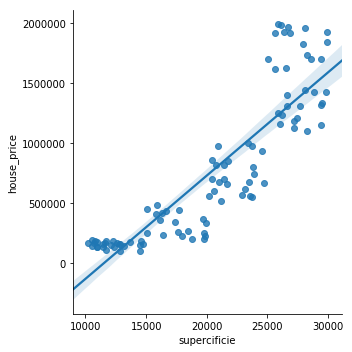

In [154]:
import seaborn as sns
sns.lmplot(x = "supercificie", y="house_price", data = df)

In [117]:
#afficher le nombre d'appartement avec plus de 3 chambres 
df.query("nombre_de_chambres >3").count() 

id                    19
nombre_de_chambres    19
nombre_de_sdb         19
supercificie          19
house_price           19
dtype: int64

In [125]:
#création d'un dataset via un dictionnaire
dic = {"transport" : ["velo", "voiture", "bus", "velo", "Bus", "Uber"]}
cat = pd.DataFrame(dic)
cat 

,transport
0,velo
1,voiture
2,bus
3,velo
4,Bus
5,Uber


In [122]:
#indicatrice 
pd.get_dummies(cat, prefix="transport", drop_first=True)

,transport_Uber,transport_bus,transport_velo,transport_voiture
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,1,0,0,0


In [128]:
cat.index

RangeIndex(start=0, stop=6, step=1)